<a href="https://colab.research.google.com/github/viviannemedeiros/modelosPreditivos/blob/master/ExercicioListaAtividade2_VivianneMedeiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto Final/Atividade 2 - Modelos Preditivos - 22/06/2020** 

**Prof:** Ricardo Prudêncio

**Discente:** Vivianne Medeiros


In [ ]:
# Importando libs necessárias

import pandas as pd
import seaborn as sns
import numpy as np

from scipy.io import arff
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

## **Atividade 2**

In [ ]:
# Carregando os dados. Importante: deve-se fazer upload do respectivo arquivo na sessão antes de executar este comando.
dados = arff.loadarff('PhishingData.arff') 

In [ ]:
dados_phishing = pd.DataFrame(dados[0], dtype=float)

### **Análise Exploratória dos Dados:** conhecendo os dados para verificar se são necessárias transformações

In [ ]:
# Colunas
dados_phishing.columns

Index(['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor',
       'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address',
       'Result'],
      dtype='object')

In [ ]:
# Amostra das instâncias
dados_phishing.head(10)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0
5,-1.0,-1.0,1.0,-1.0,-1.0,1.0,0.0,-1.0,0.0,1.0
6,1.0,-1.0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,-1.0
7,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,-1.0
8,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0
9,-1.0,0.0,-1.0,-1.0,1.0,1.0,0.0,-1.0,0.0,1.0


In [ ]:
# Tipos dos dados
dados_phishing.info() #dados_phishing.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SFH                1353 non-null   float64
 1   popUpWidnow        1353 non-null   float64
 2   SSLfinal_State     1353 non-null   float64
 3   Request_URL        1353 non-null   float64
 4   URL_of_Anchor      1353 non-null   float64
 5   web_traffic        1353 non-null   float64
 6   URL_Length         1353 non-null   float64
 7   age_of_domain      1353 non-null   float64
 8   having_IP_Address  1353 non-null   float64
 9   Result             1353 non-null   float64
dtypes: float64(10)
memory usage: 105.8 KB


In [ ]:
# Dados estatísticos gerais sobre cada coluna
dados_phishing.describe()

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
count,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000,1353.000000
mean,0.237990,-0.258684,0.327421,-0.223208,-0.025129,0.000000,-0.053215,0.219512,0.114560,-0.113821
std,0.916389,0.679072,0.822193,0.799682,0.936262,0.806776,0.762552,0.975970,0.318608,0.954773
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Verificando a quantidade de dados
dados_phishing.shape

(1353, 10)

In [ ]:
# Verificando quantidade de dados nulos
dados_phishing.isnull().sum()

SFH                  0
popUpWidnow          0
SSLfinal_State       0
Request_URL          0
URL_of_Anchor        0
web_traffic          0
URL_Length           0
age_of_domain        0
having_IP_Address    0
Result               0
dtype: int64

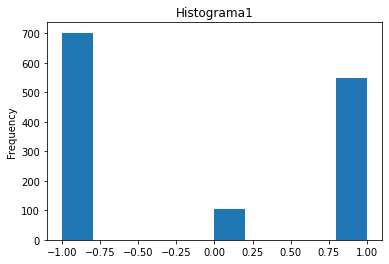

In [ ]:
# Histograma para verificar a distribuição das instâncias nas classes
dados_phishing['Result'].plot(kind='hist', title='Histograma1')

In [ ]:
dados_phishing['Result'].unique()
# dados_phishing['Result'].unique().shape
# len(dados_phishing['Result'].unique())

array([ 0.,  1., -1.])

In [ ]:
# Quantidade exata por classe
dados_phishing['Result'].value_counts()

-1.0    702
 1.0    548
 0.0    103
Name: Result, dtype: int64

In [ ]:
# Separando apenas os sites que são phishing
phishing = dados_phishing[(dados_phishing['Result']==-1.0)]
phishing.shape

(702, 10)

In [ ]:
# Separando apenas os sites que são confiáveis
confiaveis = dados_phishing[(dados_phishing['Result']==1.0)]
confiaveis.shape

(548, 10)

In [ ]:
# Separando apenas os sites que são suspeitos
suspeitos = dados_phishing[(dados_phishing['Result']==0.0)]
suspeitos.shape

(103, 10)

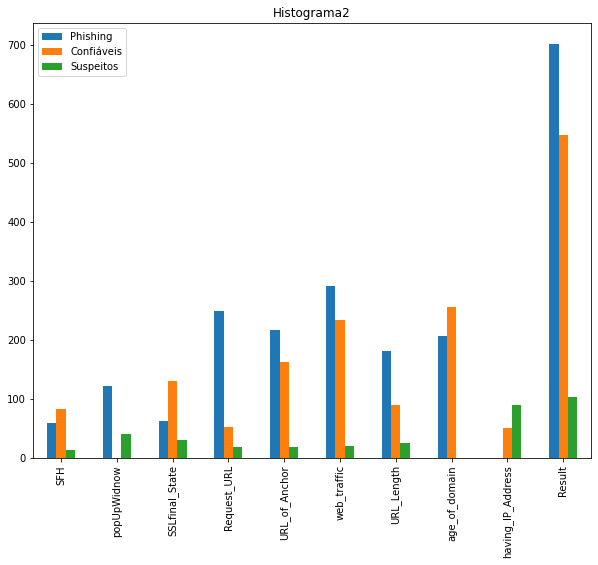

In [ ]:
# Analisando características dentro das próprias classes, a saber: phishing, sites confiáveis e suspeitos
features_list = phishing.columns
count_phishing = []
count_confiaveis = []
count_suspeitos = []

for feature in features_list:
    count_phishing.append(phishing[feature][phishing[feature] == -1.0].count())
    count_confiaveis.append(confiaveis[feature][confiaveis[feature] == 1.0].count())
    count_suspeitos.append(suspeitos[feature][suspeitos[feature] == 0.0].count())

dataframe = pd.DataFrame({'Phishing': count_phishing, 'Confiáveis': count_confiaveis, 'Suspeitos': count_suspeitos}, index=features_list)
chart = dataframe.plot.bar(figsize=(10,8), title='Histograma2')

**Análises:** verificando o **Histograma1** e os números associados, observa-se um pouco de desbalanceamento dos dados, visto que a classe "-1.0" (phishing) está mais presente do que a "1.0" (site legítimo) e a "0.0" (suspeito), esta última tendo bem menos instâncias. Tal informação será considerada ao gerar os dados de treinamento e testes.

Já no **Histograma2**, dentre os sites classificados como phishing, analisou-se quais características foram indicadas como tal, sendo as que apresentaram mais e menos instâncias, respectivamente, web_traffic e having_IP_Address. Já dentre os sites confiáveis, as características que foram mais e menos assinaladas como confiáveis são, nesta ordem, age_of_domain e popUpWidnow. Mais adiante, faremos uma análise de correlação entre as variáveis para aprofundar a discussão.







### **Gerando as bases de treinamento e testes**

In [ ]:
# Recuperando os dados 
X = dados_phishing.iloc[:, 0:-1 ] # :=todas as linhas, 0:-1=todas colunas menos a última
X

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1348,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0
1349,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0
1350,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0
1351,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0


In [ ]:
# Recuperando os rótulos 
y = dados_phishing.iloc[:, -1 ] # :=todas as linhas, -1=última coluna apenas
y # rotulo = dados_phishing['Result']

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1348    1.0
1349   -1.0
1350    1.0
1351    1.0
1352   -1.0
Name: Result, Length: 1353, dtype: float64

In [ ]:
# Dividindo base de dados em treino e teste (30% para teste)
dados_treino, dados_teste, rotulos_treino, rotulos_teste = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42) # random_state => seed

**Importante:** Conforme ressaltou-se na seção anterior, os dados estão desbalanceados, assim, utilizou-se o parâmetro "stratify=y" para balancear de forma proporcional os rótulos existentes e ter todas as classes em treino e teste.

### **Seleção dos classificadores e treinamento na base de dados**

In [ ]:
# Criando classificadores com os parâmetros default para servir de base de comparação
clf_rl = LogisticRegression()
clf_rf = RandomForestClassifier()
clf_knn = KNeighborsClassifier()

In [ ]:
# Treinando classificador Regressão Logística
clf_rl.fit(dados_treino, rotulos_treino)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Regressão Logística: Avaliando com a base de teste a acurácia do modelo gerado
predict_rl = clf_rl.predict(dados_teste)
metrics.accuracy_score(rotulos_teste, predict_rl)

0.8472906403940886

In [ ]:
# Treinando classificador RandomForest
clf_rf.fit(dados_treino, rotulos_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# RandomForest: Avaliando com a base de teste a acurácia do modelo gerado
predict_rf = clf_rf.predict(dados_teste)
metrics.accuracy_score(rotulos_teste, predict_rf)

0.8866995073891626

In [ ]:
# Treinando classificador KNN
clf_knn.fit(dados_treino, rotulos_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# KNN: Avaliando com a base de teste a acurácia do modelo gerado
predict_knn = clf_knn.predict(dados_teste)
metrics.accuracy_score(rotulos_teste, predict_knn)

0.8694581280788177

### **Avaliando e Comparando os classificadores**

In [ ]:
# Avaliando os classificadores com relação à acurácia, precisão, recall e F-measure
scoring_list = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']

# Efetuando uma validação cruzada 4-fold 
scores_rl = cross_validate(clf_rl, X, y, cv=4, scoring=scoring_list)
scores_rf = cross_validate(clf_rf, X, y, cv=4, scoring=scoring_list)
scores_knn = cross_validate(clf_knn, X, y, cv=4, scoring=scoring_list)

avg_scores_rl = []
avg_scores_rf = []
avg_scores_knn = []

for score in scoring_list:
    avg_scores_rl.append(scores_rl['test_'+score].mean())
    avg_scores_rf.append(scores_rf['test_'+score].mean())
    avg_scores_knn.append(scores_knn['test_'+score].mean())

# Imprimindo a média das métricas extraídas das 4 execuções da validação cruzada, para cada classificador
print('Métricas: acurácia, precisão, recall e F-measure')
print('Regressão Logística - ', avg_scores_rl)
print('Random Forest - ', avg_scores_rf)
print('KNN - ', avg_scores_knn)

Métricas: acurácia, precisão, recall e F-measure
Regressão Logística -  [0.8300234766368191, 0.6786312054657397, 0.6219883629144578, 0.6203562213102777]
Random Forest -  [0.8980140859820913, 0.8785079745813246, 0.8580965324213499, 0.8671677552293519]
KNN -  [0.8765796547450735, 0.8326954000680407, 0.8005228560976737, 0.8112383211187483]


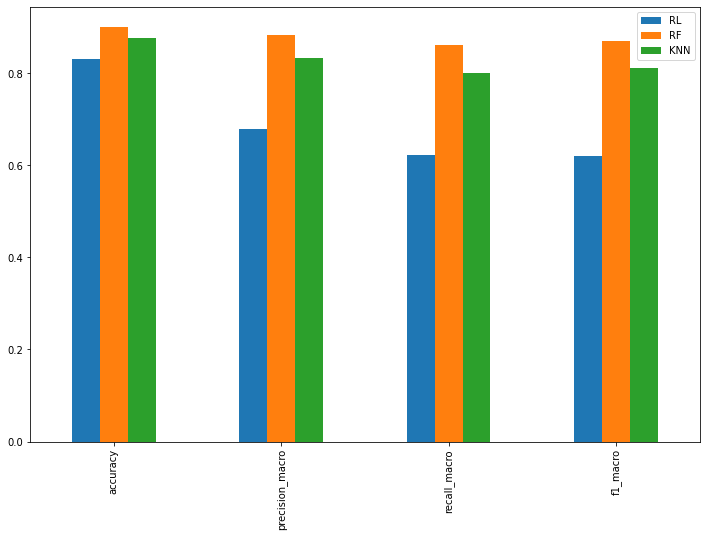

In [ ]:
df = pd.DataFrame({'RL': avg_scores_rl,
                   'RF': avg_scores_rf,
                   'KNN': avg_scores_knn}, index=scoring_list)
ax = df.plot.bar(figsize=(12,8))

**Análise:** na avaliação efetuada com os dados em questão, o RandomForest apresentou os melhores valores em todas as métricas consideradas, a saber: acurácia, precisão, recall e F-measure. Em segundo lugar, ficou o KNN e, por último, a Regressão Logística. 

Ressalta-se ainda que no RandomForest, a precisão e o recall foram altos, significando respectivamente que: i) podemos ter alta confiabilidade quando o modelo afirma que trata-se de phishing e ii) o modelo não deixa passar desclassificados muitos sites que são phishing. Dessa forma, este seria o modelo escolhido para ser utilizado nestas circunstâncias avaliadas. 

O KNN utilizou K=5 e as distâncias não foram ponderadas. No RandomForest, a profundidade da árvore também não foi definida. Tais parâmetros poderiam ser ajustados para efetuar uma nova comparação entre eles.

### **Selecionando Características e Refazendo a Análise**

In [ ]:
# Verificando a correlação de Sperman entre os atributos
dados_correlacao = dados_phishing.corr(method='spearman')
dados_correlacao

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
SFH,1.000000,0.383578,0.386249,0.231795,0.314036,-0.189490,0.150600,0.168091,0.042507,-0.698891
popUpWidnow,0.383578,1.000000,0.244573,0.112455,0.165456,-0.135077,0.136559,0.070816,0.121577,-0.513377
SSLfinal_State,0.386249,0.244573,1.000000,0.046103,0.102836,-0.163316,0.114083,0.198449,0.115657,-0.530451
Request_URL,0.231795,0.112455,0.046103,1.000000,0.311861,-0.041007,0.048621,0.047190,0.017281,-0.260166
URL_of_Anchor,0.314036,0.165456,0.102836,0.311861,1.000000,-0.091947,0.097577,0.069285,0.039955,-0.289553
web_traffic,-0.189490,-0.135077,-0.163316,-0.041007,-0.091947,1.000000,-0.109010,-0.683857,-0.094957,0.241720
URL_Length,0.150600,0.136559,0.114083,0.048621,0.097577,-0.109010,1.000000,0.076529,0.162184,-0.178642
age_of_domain,0.168091,0.070816,0.198449,0.047190,0.069285,-0.683857,0.076529,1.000000,0.040379,-0.229554
having_IP_Address,0.042507,0.121577,0.115657,0.017281,0.039955,-0.094957,0.162184,0.040379,1.000000,-0.058831
Result,-0.698891,-0.513377,-0.530451,-0.260166,-0.289553,0.241720,-0.178642,-0.229554,-0.058831,1.000000


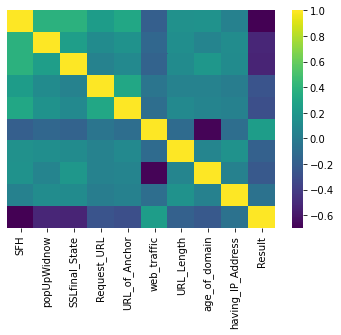

In [ ]:
# Mapa de calor com valores da correlação
sns.heatmap(dados_correlacao, yticklabels=False, cbar=True, cmap='viridis')

**Análise:** Após analisar a correlação dos atributos com o resultado da classe, observa-se que a coluna having_IP_Address apresenta valor quase nulo, denotando pouca relevância e sendo candidata a exclusão. 

A seguir, faremos uma análise mais ampla das características para selecionar os atributos mais relevantes e, então, refazer o estudo.

In [ ]:
print('========= Regressão Logística')
# Regressão Logística: seleção de features baseada na importância
print('====> Seleção baseada na Importância')
selector_rl_sfm = SelectFromModel(clf_rl)
selector_rl_sfm = selector_rl_sfm.fit(X, y)
X_rl_sfm = selector_rl_sfm.transform(X)

print('## Features selecionadas')
sel = selector_rl_sfm.get_support(True)
for s in sel:
  print(X.columns[s])

# Regressão Logística: seleção de features via eliminação recursiva 
print('====> Eliminação recursiva')
selector_rl_rfe = RFE(clf_rl, n_features_to_select=5, step=1) 
selector_rl_rfe = selector_rl_rfe.fit(X, y)
X_rl_rfe = selector_rl_rfe.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_rl_rfe.ranking_[i])

print('## Features selecionadas')
sel = selector_rl_rfe.get_support(True)
for s in sel:
  print(X.columns[s])

# Regressão Logística: seleção de features via eliminação recursiva com validação cruzada 5-fold 
print('====> Eliminação recursiva com validação cruzada 5-fold')
selector_rl_rfecv = RFECV(clf_rl, step=1, cv=5)
selector_rl_rfecv = selector_rl_rfecv.fit(X, y)
X_rl_rfecv = selector_rl_rfecv.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_rl_rfecv.ranking_[i])

print('## Features selecionadas')
sel = selector_rl_rfecv.get_support(True)
for s in sel:
  print(X.columns[s])

========= Regressão Logística
====> Seleção baseada na Importância
## Features selecionadas
SFH
popUpWidnow
SSLfinal_State
Request_URL
URL_Length
====> Eliminação recursiva
## Relevância das Features
SFH 1
popUpWidnow 1
SSLfinal_State 1
Request_URL 1
URL_of_Anchor 4
web_traffic 3
URL_Length 1
age_of_domain 5
having_IP_Address 2
## Features selecionadas
SFH
popUpWidnow
SSLfinal_State
Request_URL
URL_Length
====> Eliminação recursiva com validação cruzada 5-fold
## Relevância das Features
SFH 1
popUpWidnow 1
SSLfinal_State 1
Request_URL 1
URL_of_Anchor 2
web_traffic 1
URL_Length 1
age_of_domain 3
having_IP_Address 1
## Features selecionadas
SFH
popUpWidnow
SSLfinal_State
Request_URL
web_traffic
URL_Length
having_IP_Address


In [ ]:
print('========= Random Forest')
# Random Forest: seleção de features baseada na importância
print('====> Seleção baseada na Importância')
selector_rf_sfm = SelectFromModel(clf_rf)
selector_rf_sfm = selector_rf_sfm.fit(X, y)
X_rf_sfm = selector_rf_sfm.transform(X)

print('## Features selecionadas')
sel = selector_rf_sfm.get_support(True)
for s in sel:
  print(X.columns[s])

# Random Forest: seleção de features via eliminação recursiva 
print('====> Eliminação recursiva')
selector_rf_rfe = RFE(clf_rf, n_features_to_select=5, step=1) 
selector_rf_rfe = selector_rf_rfe.fit(X, y)
X_rf_rfe = selector_rf_rfe.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_rf_rfe.ranking_[i])

print('## Features selecionadas')
sel = selector_rf_rfe.get_support(True)
for s in sel:
  print(X.columns[s])

# Random Forest: seleção de features via eliminação recursiva com validação cruzada 5-fold 
print('====> Eliminação recursiva com validação cruzada 5-fold')
selector_rf_rfecv = RFECV(clf_rf, step=1, cv=5)
selector_rf_rfecv = selector_rf_rfecv.fit(X, y)
X_rf_rfecv = selector_rf_rfecv.transform(X)

print('## Relevância das Features')
size = len(X.columns)
for i in range(size):
  print(X.columns[i], selector_rf_rfecv.ranking_[i])

print('## Features selecionadas')
sel = selector_rf_rfecv.get_support(True)
for s in sel:
  print(X.columns[s])


========= Random Forest
====> Seleção baseada na Importância
## Features selecionadas
SFH
popUpWidnow
SSLfinal_State
====> Eliminação recursiva
## Relevância das Features
SFH 1
popUpWidnow 1
SSLfinal_State 1
Request_URL 1
URL_of_Anchor 1
web_traffic 3
URL_Length 2
age_of_domain 4
having_IP_Address 5
## Features selecionadas
SFH
popUpWidnow
SSLfinal_State
Request_URL
URL_of_Anchor
====> Eliminação recursiva com validação cruzada 5-fold
## Relevância das Features
SFH 1
popUpWidnow 1
SSLfinal_State 1
Request_URL 1
URL_of_Anchor 1
web_traffic 1
URL_Length 1
age_of_domain 2
having_IP_Address 3
## Features selecionadas
SFH
popUpWidnow
SSLfinal_State
Request_URL
URL_of_Anchor
web_traffic
URL_Length


In [ ]:
# Seleção dos melhores parâmetros do KNN baseado em GridSearch. Critério utilizado: acurácia.
n_neighbors = [1, 3, 5, 7, 11]
weights = {'uniform', 'distance'}
algorithm = {'auto', 'ball_tree', 'kd_tree', 'brute'}

best_acc = 0
for n in n_neighbors:
  for w in weights:
    for a in algorithm:
      clf_knn_new = KNeighborsClassifier(n_neighbors=n, weights=w, algorithm=a)
      clf_knn_new.fit(dados_treino, rotulos_treino)
      prediction = clf_knn_new.predict(dados_treino)
      current_acc = metrics.accuracy_score(rotulos_treino, prediction)
      if current_acc > best_acc:
        best_acc = current_acc
        best_model_knn = clf_knn_new
print('Melhor modelo:',best_model_knn)
print('Acurácia em treinamento:', best_acc)
predict_test = best_model_knn.predict(dados_teste)
print('Acurácia em teste:', metrics.accuracy_score(rotulos_teste, predict_test))

Melhor modelo: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')
Acurácia em treinamento: 0.9662090813093981
Acurácia em teste: 0.8694581280788177


In [ ]:
# Efetuando nova validação cruzada 4-fold após a seleção de features e de novos parâmetros pro KNN
scores_rl_sfm = cross_validate(clf_rl, X_rl_sfm, y, cv=4, scoring=scoring_list)
scores_rl_rfe = cross_validate(clf_rl, X_rl_rfe, y, cv=4, scoring=scoring_list)
scores_rl_rfecv = cross_validate(clf_rl, X_rl_rfecv, y, cv=4, scoring=scoring_list)

scores_rf_sfm = cross_validate(clf_rf, X_rf_sfm, y, cv=4, scoring=scoring_list)
scores_rf_rfe = cross_validate(clf_rf, X_rf_rfe, y, cv=4, scoring=scoring_list)
scores_rf_rfecv = cross_validate(clf_rf, X_rf_rfecv, y, cv=4, scoring=scoring_list)

scores_knn_new = cross_validate(best_model_knn, X, y, cv=4, scoring=scoring_list)

avg_scores_rl_sfm = []
avg_scores_rl_rfe = []
avg_scores_rl_rfecv = []
avg_scores_rf_sfm = []
avg_scores_rf_rfe = []
avg_scores_rf_rfecv = []
avg_scores_knn_new = []

for score in scoring_list:
    avg_scores_rl_sfm.append(scores_rl_sfm['test_'+score].mean())
    avg_scores_rl_rfe.append(scores_rl_rfe['test_'+score].mean())
    avg_scores_rl_rfecv.append(scores_rl_rfecv['test_'+score].mean())
    avg_scores_rf_sfm.append(scores_rf_sfm['test_'+score].mean())
    avg_scores_rf_rfe.append(scores_rf_rfe['test_'+score].mean())
    avg_scores_rf_rfecv.append(scores_rf_rfecv['test_'+score].mean())
    avg_scores_knn_new.append(scores_knn_new['test_'+score].mean())

# Imprimindo a média das métricas extraídas das 4 execuções da validação cruzada, para cada classificador
print('Métricas: acurácia, precisão, recall e F-measure')
print('Regressão Logística - Inicial: ', avg_scores_rl)
print('Regressão Logística - SFM: ', avg_scores_rl_sfm)
print('Regressão Logística - RFE: ', avg_scores_rl_rfe)
print('Regressão Logística - RFECV: ', avg_scores_rl_rfecv)

print('Random Forest - Inicial: ', avg_scores_rf)
print('Random Forest - SFM: ', avg_scores_rf_sfm)
print('Random Forest - RFE: ', avg_scores_rf_rfe)
print('Random Forest - RFECV: ', avg_scores_rf_rfecv)

print('KNN - Inicial: ', avg_scores_knn)
print('KNN - Melhor modelo: ', avg_scores_knn_new)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Pr

Métricas: acurácia, precisão, recall e F-measure
Regressão Logística - Inicial:  [0.8300234766368191, 0.6786312054657397, 0.6219883629144578, 0.6203562213102777]
Regressão Logística - SFM:  [0.8263143425668953, 0.6171606562630251, 0.6106304477153017, 0.6008253083137234]
Regressão Logística - RFE:  [0.8263143425668953, 0.6171606562630251, 0.6106304477153017, 0.6008253083137234]
Regressão Logística - RFECV:  [0.8322380478609206, 0.6948513239438168, 0.6232713241746088, 0.6220339660116947]
Random Forest - Inicial:  [0.8980140859820913, 0.8785079745813246, 0.8580965324213499, 0.8671677552293519]
Random Forest - SFM:  [0.840363233317624, 0.5877616684221538, 0.6089310658927447, 0.5874306198476392]
Random Forest - RFE:  [0.8773083904976349, 0.8737939699142305, 0.7239343184188075, 0.7567759388922817]
Random Forest - RFECV:  [0.8935827616903179, 0.8770279371090021, 0.8682236680594343, 0.8721876156832754]
KNN - Inicial:  [0.8765796547450735, 0.8326954000680407, 0.8005228560976737, 0.8112383211187

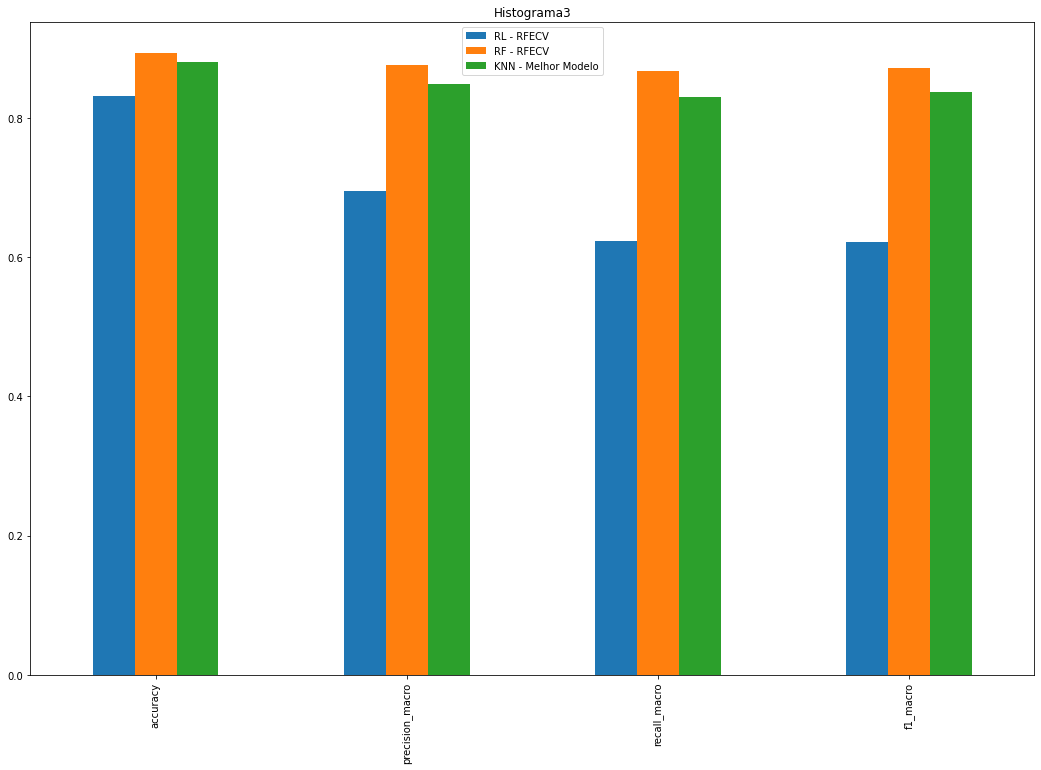

In [ ]:
# Melhores classificadores em cada algoritmo após seleção de características relevantes
df = pd.DataFrame({'RL - RFECV': avg_scores_rl_rfecv,
                   'RF - RFECV': avg_scores_rf_rfecv,
                   'KNN - Melhor Modelo': avg_scores_knn_new}, index=scoring_list)
ax = df.plot.bar(figsize=(18,12), title='Histograma3')

**Análise:** utilizou-se seleção de *features* através de três recursos distintos disponibilizados no sklearn, a saber: SelectFromModel (baseia-ne na importância das features), RFE (seleção recursiva de features, onde as menos importantes vão sendo excluídas a cada passo) e RFECV (seleção recursiva de features combinada com validação cruzada).

Tais técnicas não são suportadas pelo KNN, por isso não foram aplicadas neste classificador. Para compensar, variou-se os seguintes parâmetros para ter outras possibilidades de comparação: número de vizinhos, ponderação da distância e o algoritmo usado para calcular a distância. Realizou-se uma GridSearch para escolher o melhor modelo baseado na acurácia e então procedeu-se a uma nova execução da validação cruzada.

Passando à análise dos resultados dos diversos algoritmos, observou-se que o Random Forest com a seleção através de RFECV apresentou melhor recall e f-measure do que o inicial. A melhora no recall significa que mais sites que são phishing serão reconhecidos como tal. A f-measure é uma combinação entre recall e precision e também apresenta-se como bom indicador para critério de escolha do algoritmo a ser utilizado. Dessa forma, indica-se a escolha do "Random Forest - RFECV" para a aplicação em questão. 

Destaca-se ainda que o "KNN - Melhor modelo" foi mais otimizado que o "KNN - Inicial" com relação a todas as métricas utilizadas e, neste caso, seria uma segunda opção de escolha.

Por fim, o **Histograma3** apresenta a comparação entre as métricas dos melhores modelos após a seleção de características, servindo como subsídio para a discussão efetuada acima. 


